In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
from signlens.preprocessing.data import *
from signlens.preprocessing.preprocess import *
from sklearn.model_selection import train_test_split
from signlens.model.model import *
from tensorflow.keras.optimizers import Adam
from signlens.params import *
from utils.model_utils import *

2024-03-22 10:22:55.181476: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-22 10:22:55.231993: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 10:22:56.336373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
train=load_data_subset_csv(balanced=True)

Loading data subset from train_train.csv
✅ Filtered on n_frames = 100. Size reduced from 94461 to 85629 (90.7%)
✅ Filtered on n_classes = 10. Size reduced from 85629 to 3460 (4.0%)
⚠️ Total size smaller than requested, with 329 per sign instead of 346
✅ Balanced data, with average of 329.0 elements per class. Size reduced from 3460 to 3290 (95.1%)
✅ Loaded 3460 rows (3.5% of the original 94461 rows) from the dataset.


In [10]:
model =load_model()



Load latest model from local registry...

Load latest model from disk...
✅ Model loaded from local disk /home/wailmouro/code/benoitfrisque/signlens/training_outputs/models/20240322-104614.h5


In [8]:
unique_train_test_split()


Loading unqiue test set with test_size=0.2
Loading data subset from train.csv
✅ File with frames already exists, loaded matching 'sequence_id' rows.
✅ Filtered on n_frames = 100. Size reduced from 94477 to 86168 (91.2%)
✅ Filtered on n_classes = 250. Size reduced from 86168 to 86168 (100.0%)
✅ Balanced data, with average of 68.932 elements per class. Size reduced from 86168 to 17233 (20.0%)
✅ Loaded 86168 rows (18.2% of the original 94477 rows) from the dataset.

Loading training test set
Loading data subset from train.csv
✅ File with frames already exists, loaded matching 'sequence_id' rows.
✅ Filtered on n_classes = 250. Size reduced from 94477 to 94461 (100.0%)
✅ Loaded 94461 rows (100.0% of the original 94477 rows) from the dataset.

Total loaded rows : 94461         
Total training rows : 94461 (100.0%)         
Total test rows : 17233 (18.2%)

Train and test data saved at /home/wailmouro/code/benoitfrisque/signlens/raw_data/asl-signs/train_train.csv and /home/wailmouro/code/benoi

In [74]:
metrics_dict = evaluate_model(model=model, X=X_test, y=y_test)


Evaluating model on 2344 rows...
✅ Model evaluated, loss: 3.69


In [76]:
metrics_dict["accuracy"]

0.03242320939898491

In [73]:
local_model_directory = os.path.join(MODEL_DIR)
local_model_paths = glob.glob(f"{MODEL_DIR}/*.h5")
most_recent_model_path_on_disk = sorted(local_model_paths)[-1]



Evaluating model on 9376 rows...


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 9376
'y' sizes: 11720


In [72]:
most_recent_model_path_on_disk

'/home/wailmouro/code/benoitfrisque/signlens/training_outputs/models/20240321-181047.h5'

In [57]:
load_model()


Load latest model from local registry...

Load latest model from disk...


ValueError: File format not supported: filepath=/home/wailmouro/code/benoitfrisque/signlens/training_outputs/models/model_fit_at_1711040746. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(/home/wailmouro/code/benoitfrisque/signlens/training_outputs/models/model_fit_at_1711040746, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [21]:
train=load_data_subset_csv(balanced=True)
train

Loading data subset from train_train.csv
✅ Filtered on n_frames = 100. Size reduced from 94461 to 85670 (90.7%)
✅ Filtered on n_classes = 10. Size reduced from 85670 to 3466 (4.0%)
⚠️ Total size smaller than requested, with 332 per sign instead of 346
✅ Balanced data, with average of 332.0 elements per class. Size reduced from 3466 to 3320 (95.8%)
✅ Loaded 3466 rows (3.5% of the original 94461 rows) from the dataset.


,path,participant_id,sequence_id,sign,n_frames,n_frames2,file_path
0,train_landmark_files_noface/26734/787679090.pa...,26734.0,787679090,before,10.0,10.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
1,train_landmark_files_noface/55372/4212350669.p...,55372.0,4212350669,yes,20.0,20.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
2,train_landmark_files_noface/34503/1428365339.p...,34503.0,1428365339,no,46.0,46.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
3,train_landmark_files_noface/37779/2267514415.p...,37779.0,2267514415,chair,8.0,8.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
4,train_landmark_files_noface/26734/948253829.pa...,26734.0,948253829,chair,65.0,65.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
...,...,...,...,...,...,...,...
3315,train_landmark_files_noface/34503/2067083603.p...,34503.0,2067083603,book,8.0,8.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
3316,train_landmark_files_noface/26734/1418650900.p...,26734.0,1418650900,chair,6.0,6.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
3317,train_landmark_files_noface/55372/4041937502.p...,55372.0,4041937502,no,9.0,9.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
3318,train_landmark_files_noface/4718/733897403.par...,4718.0,733897403,who,98.0,98.0,/home/wailmouro/code/benoitfrisque/signlens/ra...


In [28]:
y_unique_sign=sorted(train["sign"].unique())
y_unique_sign

['all', 'before', 'book', 'chair', 'drink', 'fine', 'go', 'no', 'who', 'yes']

In [26]:
y_unique_sign=sorted(test["sign"].unique())
y_unique_sign

['all', 'before', 'book', 'chair', 'drink', 'fine', 'go', 'no', 'who', 'yes']

In [17]:
test=load_data_subset_csv(balanced=True,csv_path=TRAIN_TEST_CSV_PATH)
test

Loading data subset from train_test.csv
✅ Filtered on n_frames = 100. Size reduced from 17233 to 17233 (100.0%)
✅ Filtered on n_classes = 10. Size reduced from 17233 to 690 (4.0%)
✅ Balanced data, with average of 69.0 elements per class. Size reduced from 690 to 690 (100.0%)
✅ Loaded 690 rows (4.0% of the original 17233 rows) from the dataset.


,path,participant_id,sequence_id,sign,n_frames,n_frames2,file_path
0,train_landmark_files_noface/61333/3243872811.p...,61333,3243872811,no,20.0,20.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
1,train_landmark_files_noface/32319/2163418116.p...,32319,2163418116,yes,24.0,24.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
2,train_landmark_files_noface/26734/844570025.pa...,26734,844570025,who,26.0,26.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
3,train_landmark_files_noface/62590/750243503.pa...,62590,750243503,go,8.0,8.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
4,train_landmark_files_noface/30680/3043344504.p...,30680,3043344504,no,7.0,7.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
...,...,...,...,...,...,...,...
685,train_landmark_files_noface/49445/854246737.pa...,49445,854246737,no,53.0,53.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
686,train_landmark_files_noface/32319/2058774192.p...,32319,2058774192,book,6.0,6.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
687,train_landmark_files_noface/53618/1533865155.p...,53618,1533865155,go,6.0,6.0,/home/wailmouro/code/benoitfrisque/signlens/ra...
688,train_landmark_files_noface/22343/1210283400.p...,22343,1210283400,yes,23.0,23.0,/home/wailmouro/code/benoitfrisque/signlens/ra...


In [43]:
create_folder_model()

{'model_save_path': '/home/wailmouro/code/benoitfrisque/signlens/training_outputs/model 20240322-125550/model',
 'model_save_epoch_path': '/home/wailmouro/code/benoitfrisque/signlens/training_outputs/model 20240322-125550/model/model each epoch',
 'model_save_plot_path': '/home/wailmouro/code/benoitfrisque/signlens/training_outputs/model 20240322-125550/model/plot',
 'log_path': '/home/wailmouro/code/benoitfrisque/signlens/training_outputs/model 20240322-125550/log',
 'metrics_path': '/home/wailmouro/code/benoitfrisque/signlens/training_outputs/model 20240322-125550/metrics',
 'params_path': '/home/wailmouro/code/benoitfrisque/signlens/training_outputs/model 20240322-125550/params'}

In [15]:
aX, X_test, y_t, y_test = train_test_split(train.file_path, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y_t, test_size=0.2, random_state=42, stratify=y_t)

In [62]:
keras.models.load_model("/home/wailmouro/code/benoitfrisque/signlens/training_outputs/model 20240322-132441/model/model_20240322-132500.keras")

<Sequential name=sequential, built=True>

In [59]:
sorted(glob.glob(os.path.join(TRAIN_OUTPUT_DIR, "model*")),key=os.path.getctime)


['/home/wailmouro/code/benoitfrisque/signlens/training_outputs/model 20240322-131156',
 '/home/wailmouro/code/benoitfrisque/signlens/training_outputs/model 2024']

In [52]:
keras_files = glob.glob(os.path.join(model_directory, "*.keras"))

['/home/wailmouro/code/benoitfrisque/signlens/training_outputs/model 20240322-131156/model/model_20240322-131216.keras']

In [50]:
keras.models.load_model("/home/wailmouro/code/benoitfrisque/signlens/training_outputs/model 20240322-131156/model/model_20240322-131216.keras")

<Sequential name=sequential, built=True>

In [17]:
X_train=group_pad_sequences(X_train)
X_val=group_pad_sequences(X_val)
X_test=group_pad_sequences(X_test)


In [18]:

model=initialize_model(num_classes=y.shape[1])
model=compile_model(model)


/home/wailmouro/.pyenv/versions/3.10.6/envs/signlens/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-03-21 17:29:58.408771: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 17:29:58.409248: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [19]:
int(X_train.shape[0]/32)+1

235

In [20]:
model_trained, history=train_model(model,X_train,y_train,patience=10,verbose=1,batch_size=32,validation_data=[X_val,y_val])


Training model...
Epoch 1/2


2024-03-21 17:30:40.608788: E tensorflow/core/util/util.cc:131] oneDNN supports DT_BOOL only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.0251 - loss: 3.7262 - val_accuracy: 0.0251 - val_loss: 3.6893 - learning_rate: 0.0010
Epoch 2/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.0302 - loss: 3.6906 - val_accuracy: 0.0299 - val_loss: 3.6878 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 2.
✅ Model trained on 7500 rows


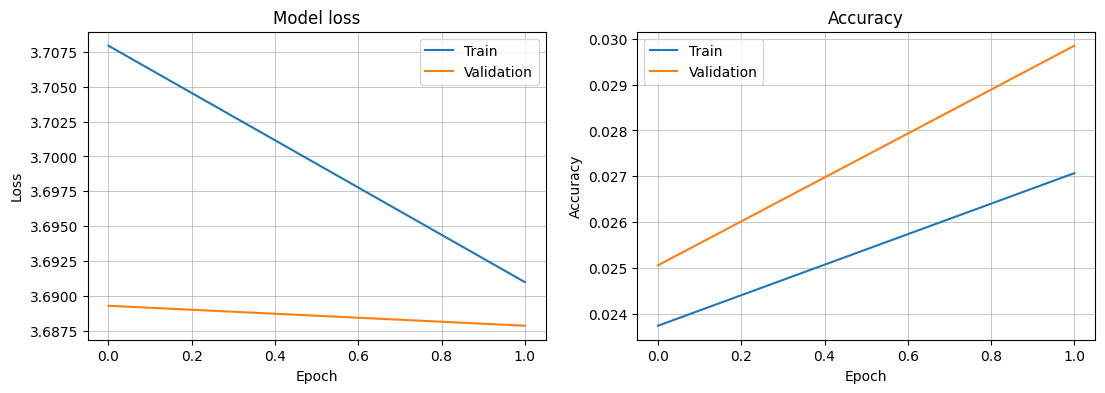

In [21]:
plot_history(history)

In [31]:
val_accuracy = np.max(history.history['val_accuracy'])
val_loss = np.max(history.history['val_loss'])

In [32]:
params = dict(
        context="train",
        training_frac=DATA_FRAC,
        row_count=len(X_train),
    )

In [65]:
timestamp = time.strftime("%Y%m%d-%H%M%S")
os.path.join(f"training_{timestamp}.pickle")

'training_20240322-133859.pickle'

In [33]:
save_results(params=params, metrics=dict(val_accuracy=val_accuracy,val_loss=val_loss))

✅ Results saved locally


In [63]:
from tensorflow.keras.models import load_model

In [67]:
load_model("/home/wailmouro/code/benoitfrisque/signlens/training_outputs/models/model_epoch_09.keras")

<Sequential name=sequential_5, built=True>